In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_cold2.6_fxdlhf'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
myfontsize = 12

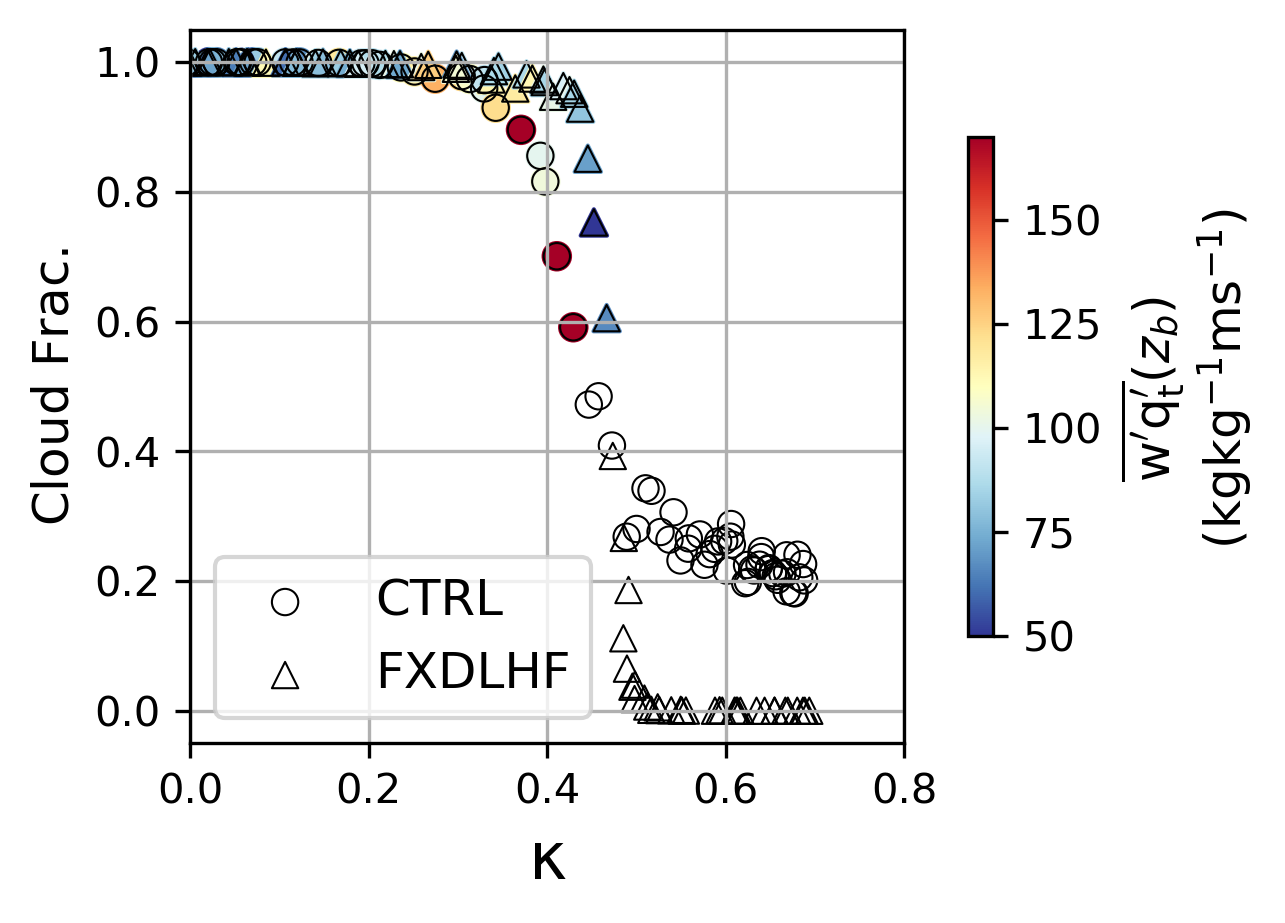

In [6]:
ind = np.where(f['CLDLOW'].values  > 0.5)
ind1 = np.where(f1['CLDLOW'].values  > 0.5)

fig, axs = plt.subplots(1,1,figsize=[10/2.54, (8)/2.54], dpi = 300)

#
mylevels = np.arange(50.,171.,1.)

oax = axs.scatter(f['kappa_out'].where(f['CLDLOW'] > 0.5), 
                  f['CLDLOW'].where(f['CLDLOW'] > 0.5), s = 40, 
                  facecolors='none', c = f['QTFLX_cb_out'].where(f['CLDLOW'] > 0.5), 
                  cmap = cm.RdYlBu_r, vmin=mylevels[0], vmax=mylevels[120])

axs.scatter(f1['kappa_out'].where(f1['CLDLOW'] > 0.5), 
            f1['CLDLOW'].where(f1['CLDLOW'] > 0.5), s = 40, 
            marker='^', c = f1['QTFLX_cb_out'].where(f1['CLDLOW'] > 0.5), 
            cmap = cm.RdYlBu_r, vmin=mylevels[0], vmax=mylevels[120])

cbar = plt.colorbar(oax,  ax=axs, orientation='vertical', pad=0.07, shrink = 0.7)
cbar.set_label("$\mathrm{\overline{w^{\prime}q_t^{\prime}}}(z_b)$ \n $\mathrm{(kgkg^{-1}ms^{-1})}$", fontsize=myfontsize)

axs.scatter(f['kappa_out'], f['CLDLOW'], label = 'CTRL', 
            facecolors='none',color = 'black', linewidth=0.5, s = 40)
axs.scatter(f1['kappa_out'], f1['CLDLOW'], label = 'FXDLHF', 
            facecolors='none', marker='^', color = 'black', linewidth=0.5, s = 40)

axs.legend(loc="lower left", fontsize=myfontsize)


axs.set_xlim((0, 0.8))
axs.set_ylabel(r"$\mathrm{Cloud \ Frac.}$", fontsize=myfontsize)
axs.set_xlabel(r"$\mathrm{\kappa}$", fontsize=1.3*myfontsize)

axs.grid(True)

fig.savefig('Fig10_kappa_cldlow.png', dpi=fig.dpi, bbox_inches='tight')